In [33]:
# Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
path = '/Users/DonginKim/Documents/Datasets'
os.chdir(path)

In [35]:
df = pd.read_csv('iris.csv')
del df['Id']
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [36]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [37]:
df.describe()  

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
df.groupby('Species').size() #n=50 for each speicies

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Box plot 

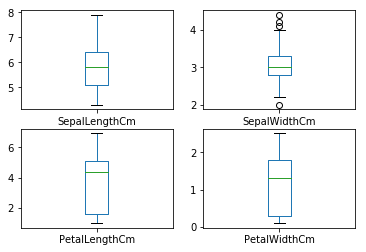

In [39]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Scatter plot 

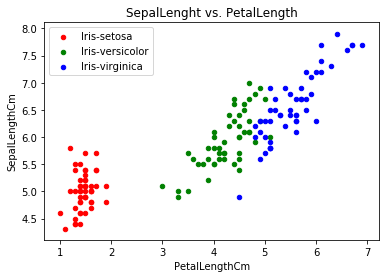

In [40]:
ax = df[df['Species'] == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='SepalLengthCm', color='red', \
                                             label='Iris-setosa', title="SepalLenght vs. PetalLength")

df[df['Species'] == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='SepalLengthCm', color='green', \
                                            label='Iris-versicolor', ax=ax)

df[df['Species'] == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='SepalLengthCm', color='blue', \
                                           label='Iris-virginica', ax=ax)

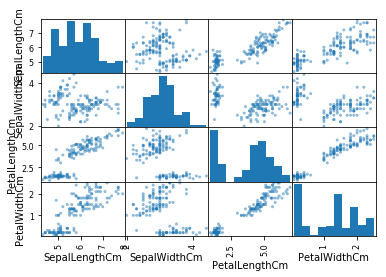

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

# Easier way 

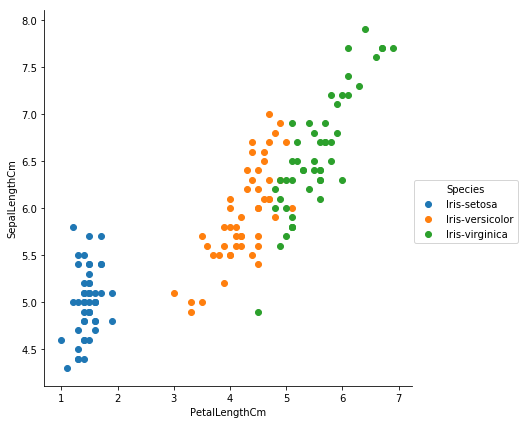

In [42]:
sns.FacetGrid(df, hue='Species', size=6).map(plt.scatter, 'PetalLengthCm', 'SepalLengthCm').add_legend()

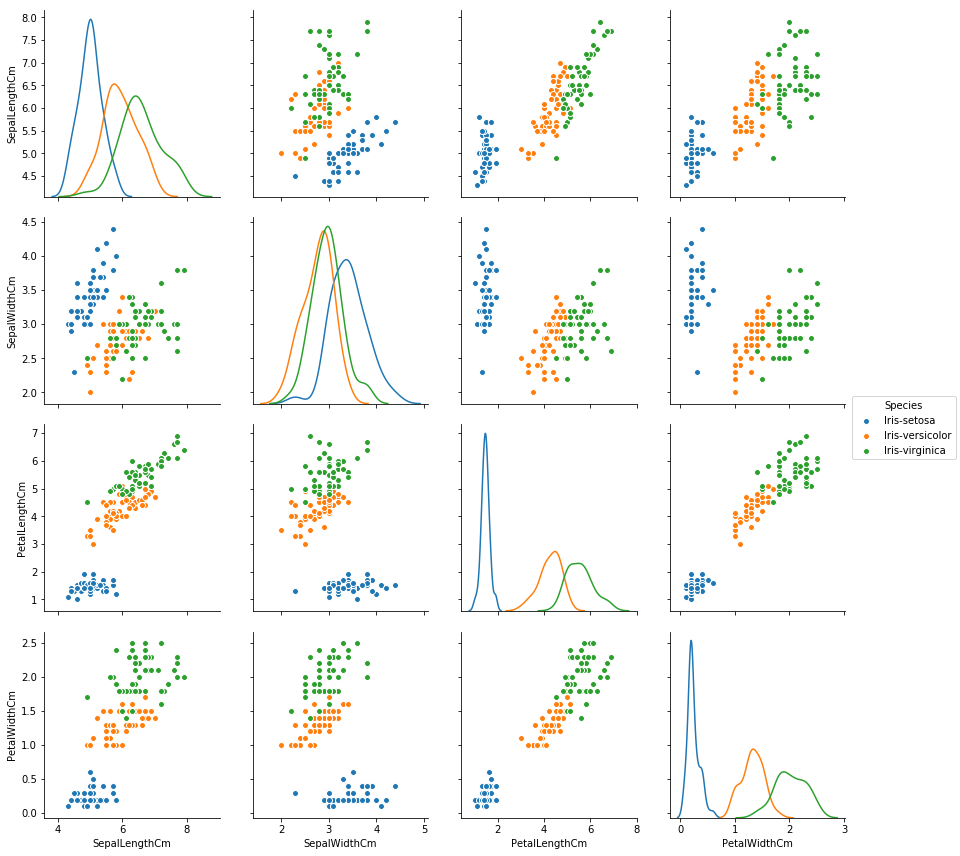

In [43]:
sns.pairplot(df, hue='Species', size=3, diag_kind='kde')

# Machine Learning

# Split-out validation dataset

In [44]:
# Test options and evaluation metric
test_size = 0.20
seed = 7
scoring = 'accuracy'

In [45]:
array = df.values
X = array[:, 0:4]
y = array[:, 4]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

# Build models
* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN)
* Classification and Regression Trees (CART)
* Gaussian Naive Bayes (NB)
* Support Vector Machines (SVM)


In [46]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


We can see that it looks like KNN has the largest estimated accuracy score.

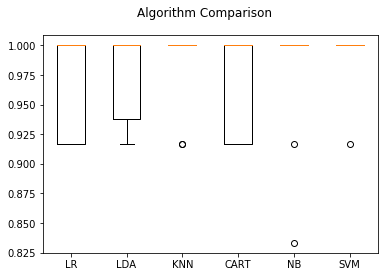

In [47]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

You can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

# # Make predictions on validation dataset 

## K-Nearest Neighbors  

In [48]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

## Decision Tree 

In [55]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [56]:
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_names = ['setosa', 'versicolor', 'virginica']

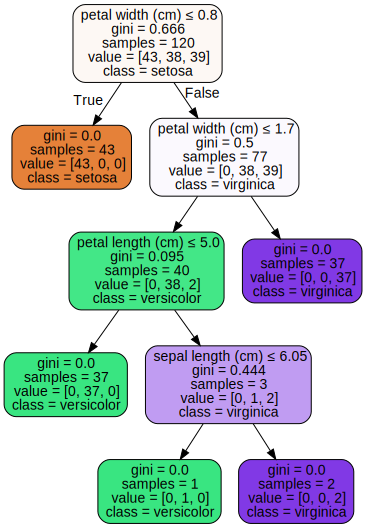

In [68]:
import graphviz 
import pydot 
from sklearn import tree
from sklearn.externals.six import StringIO


dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True,
                         feature_names=feature_names,  
                         class_names=class_names)  

graph = graphviz.Source(dot_data)  
graph 

#graph.render(filename='iris.png')